In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Data/sensor.csv", index_col=0)

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

In [4]:
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [5]:
df['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [6]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [7]:
df_missing = missing_values_table(df)
df_missing

Your selected dataframe has 53 columns.
There are 52 columns that have missing values.


,Missing Values,% of Total Values
sensor_15,220320,100.0
sensor_50,77017,35.0
sensor_51,15383,7.0
sensor_00,10208,4.6
sensor_07,5451,2.5
sensor_08,5107,2.3
sensor_06,4798,2.2
sensor_09,4595,2.1
sensor_01,369,0.2
sensor_30,261,0.1


We can drop sensor 15 as the entire column is missing, as for the other, let's just do forward filling for now. We may also fill with mean or use other advanced method

In [8]:
df = df.drop('sensor_15', axis=1)

In [9]:
df = df.fillna(method='ffill')

In [10]:
# Sanity check to make sure we dont have any nulls
df_missing = missing_values_table(df)
df_missing

Your selected dataframe has 52 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


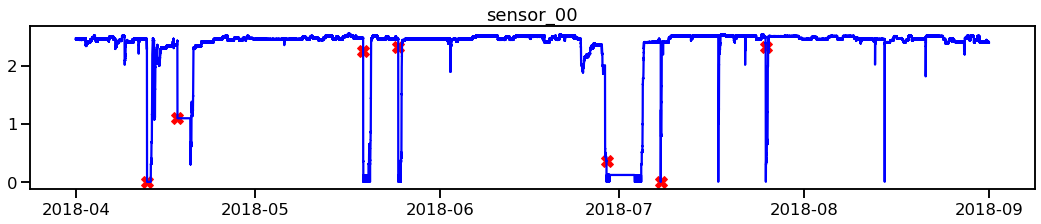

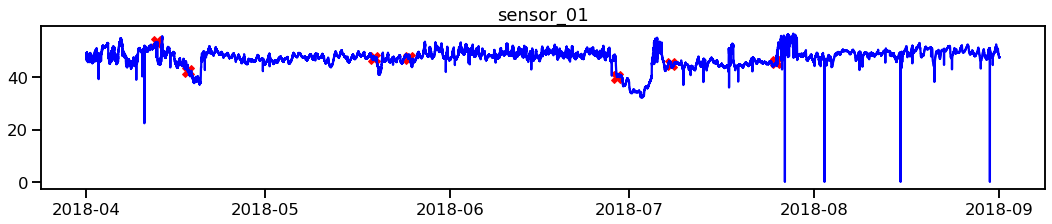

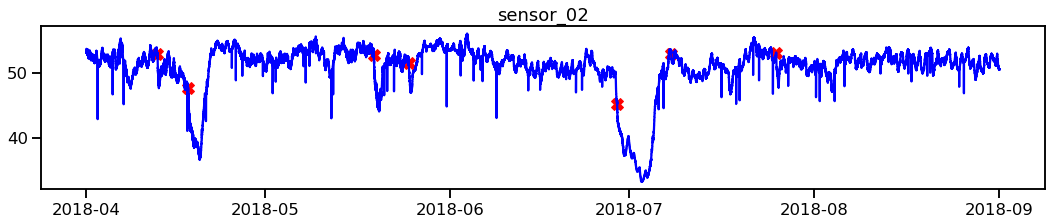

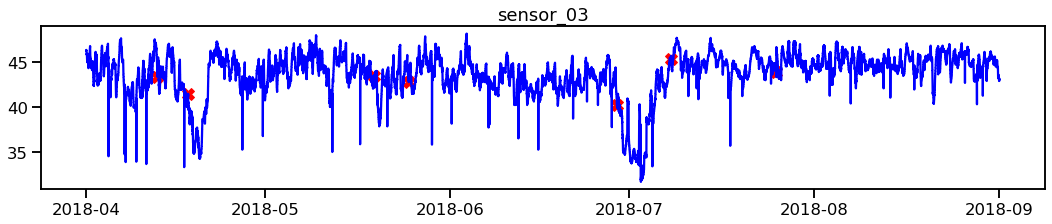

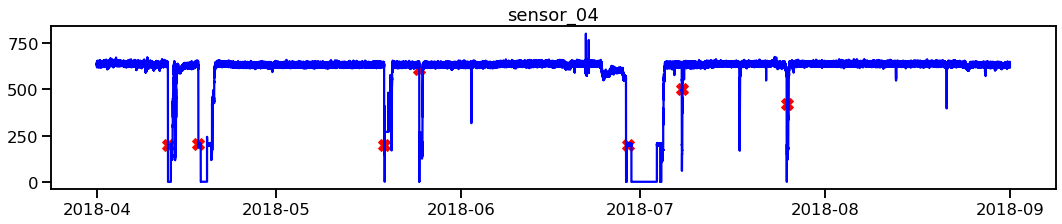

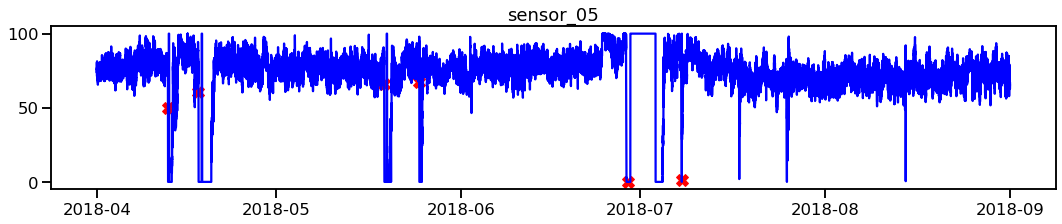

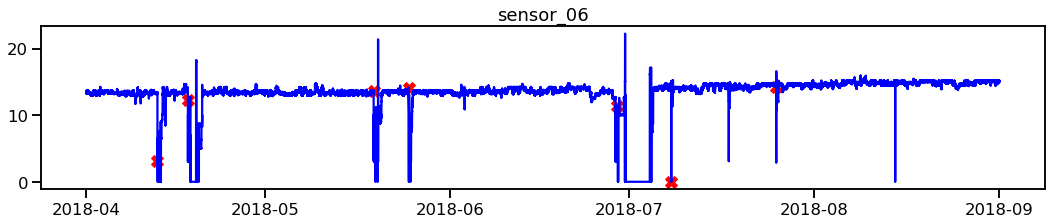

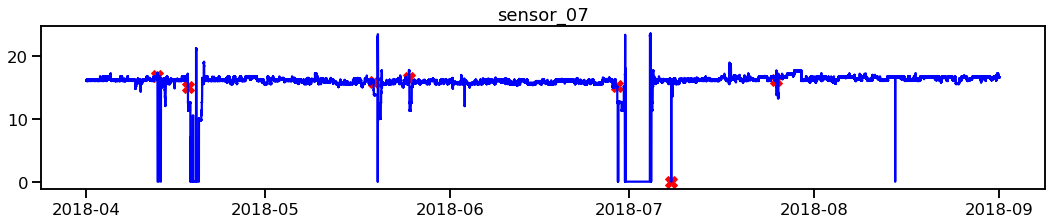

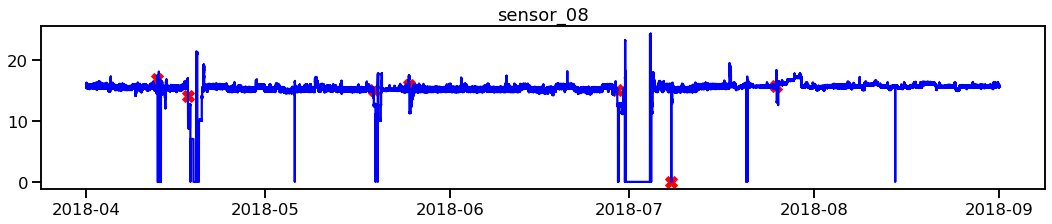

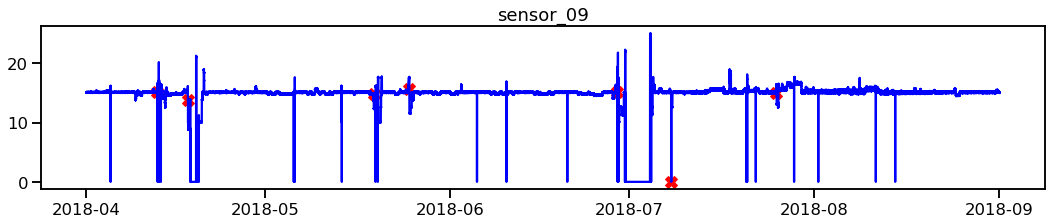

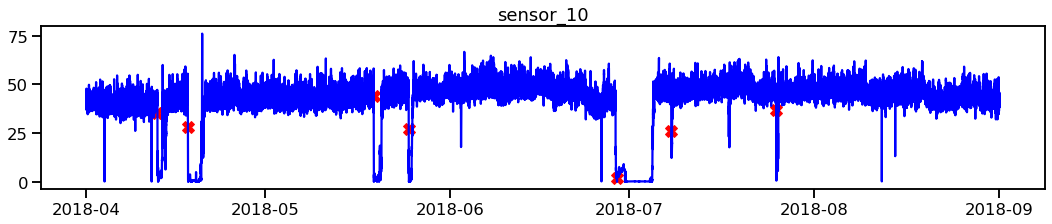

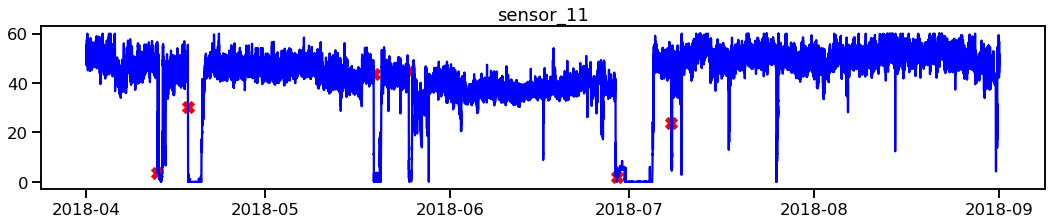

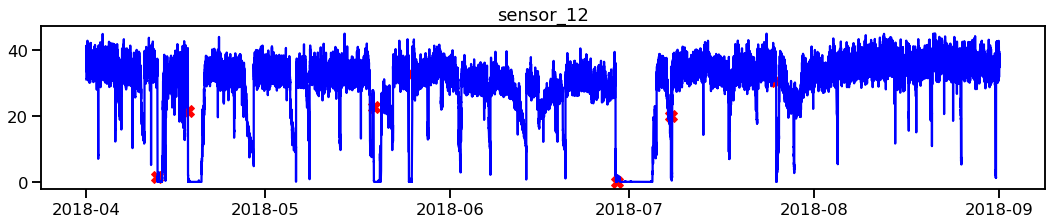

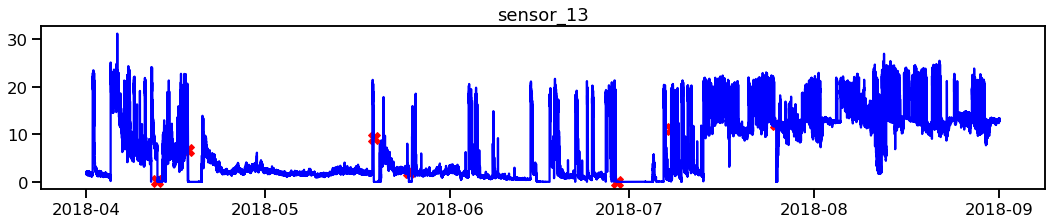

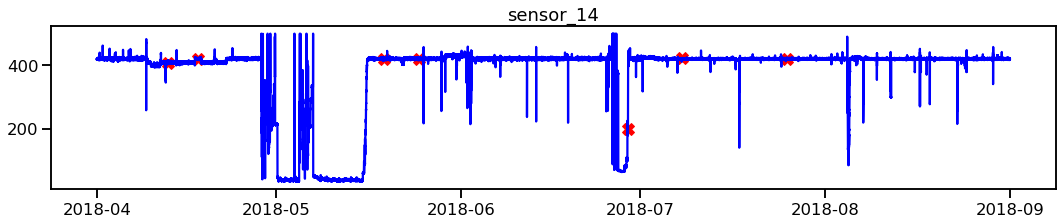

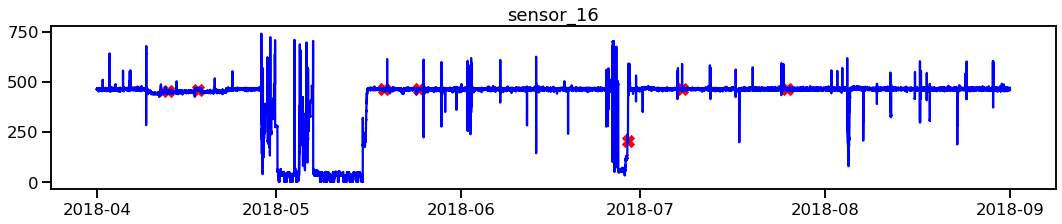

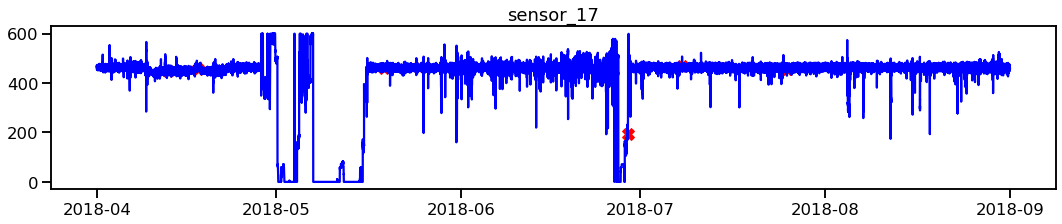

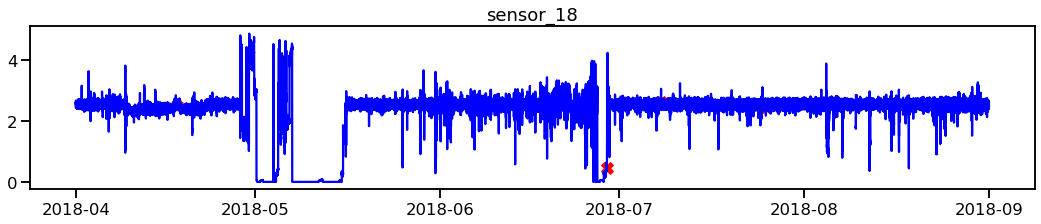

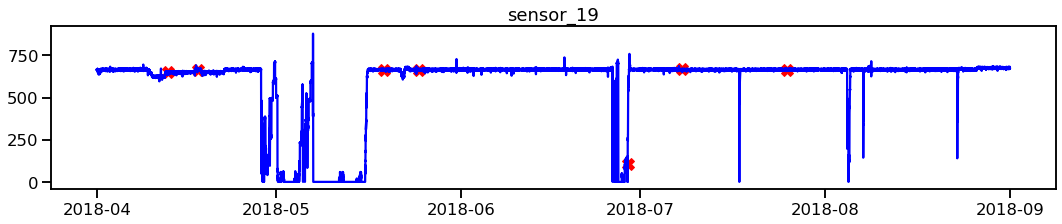

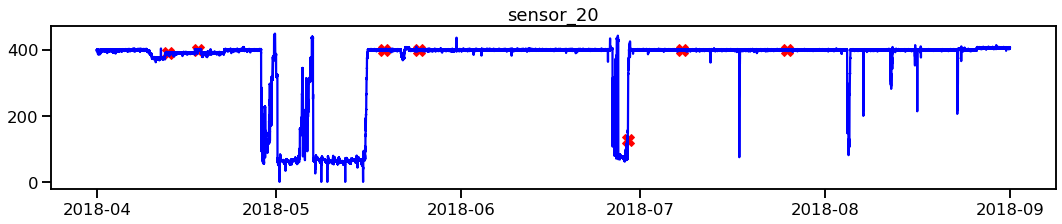

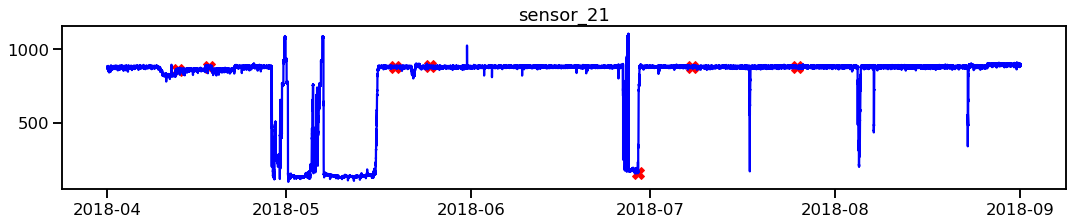

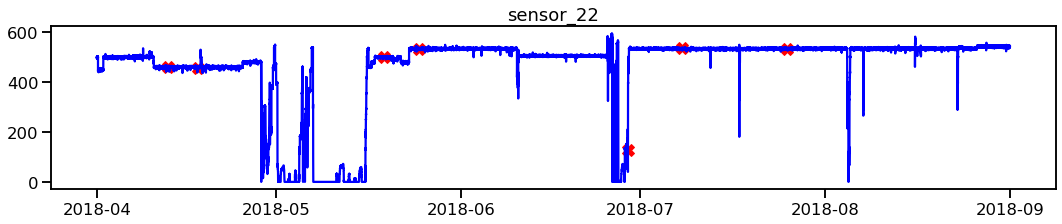

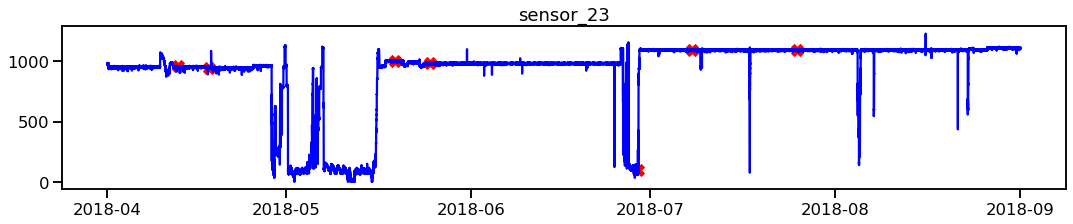

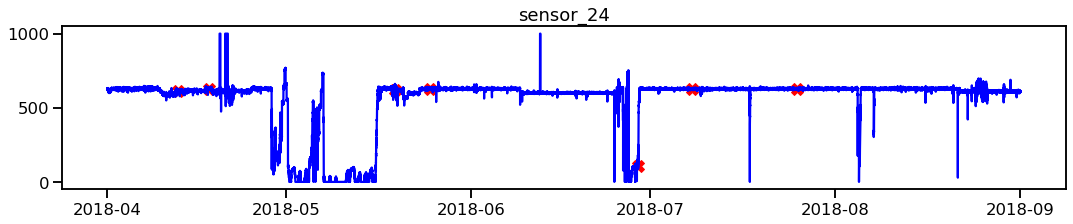

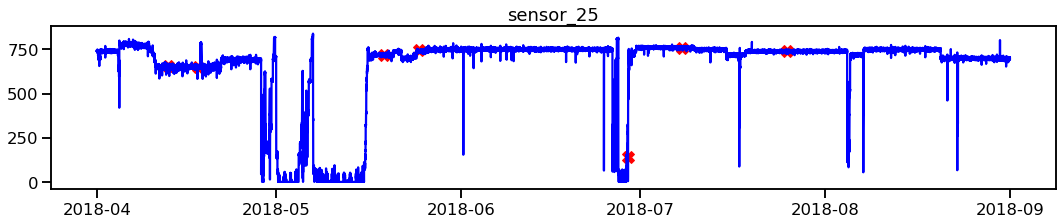

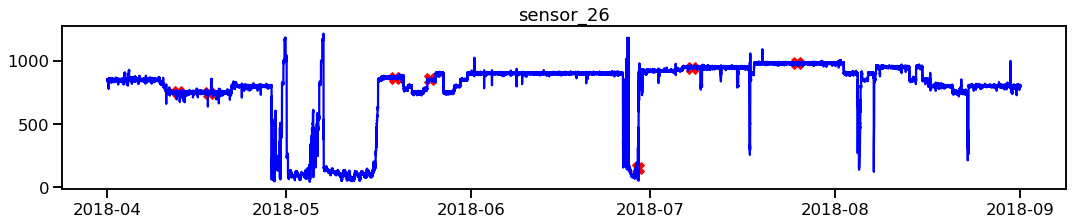

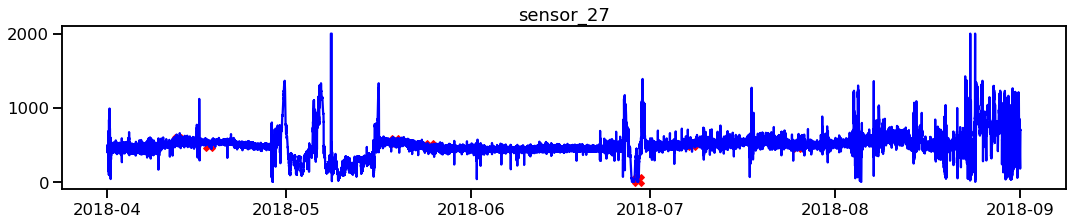

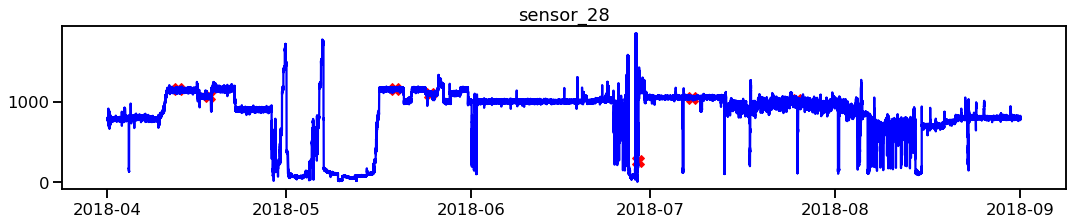

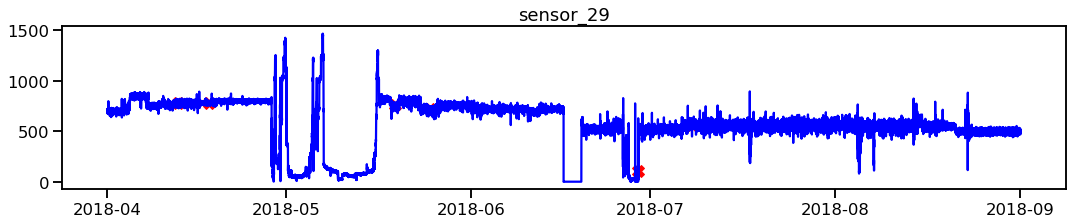

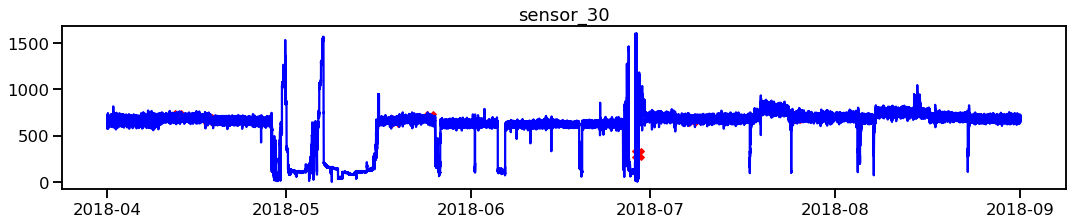

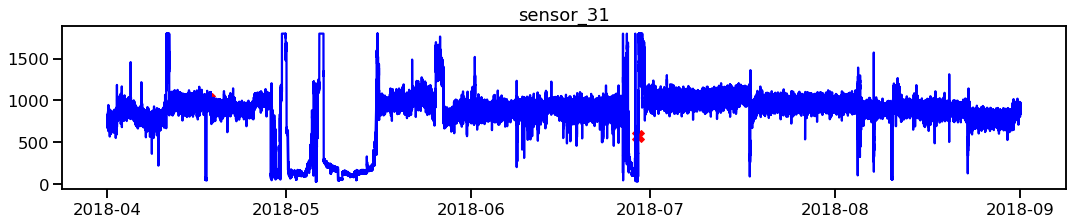

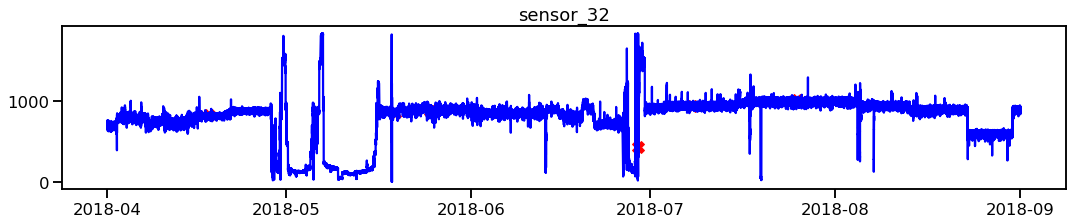

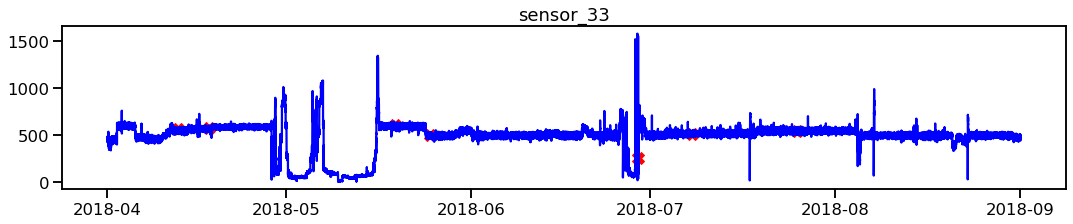

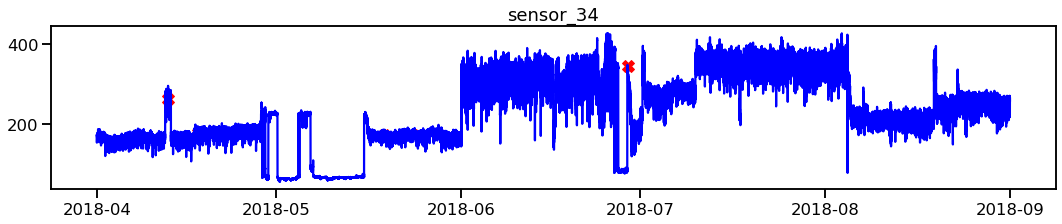

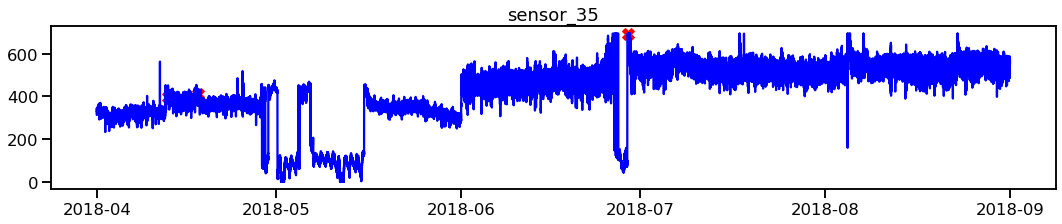

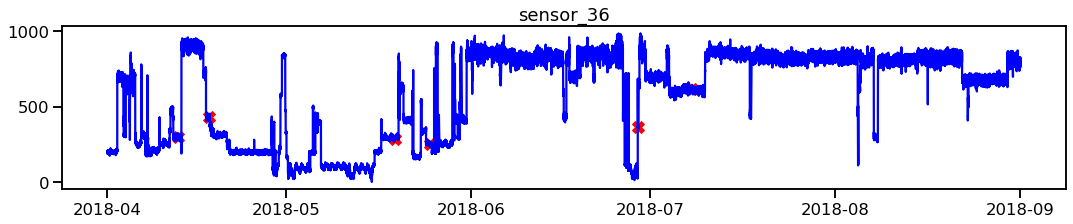

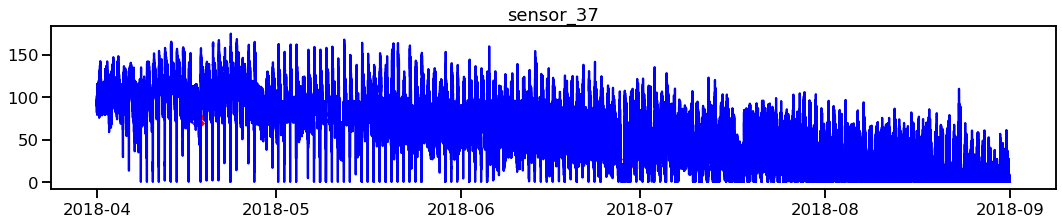

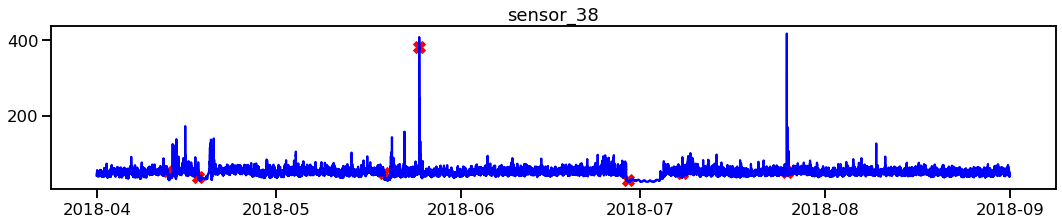

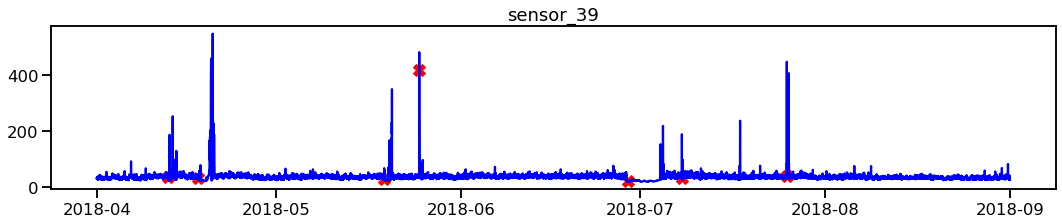

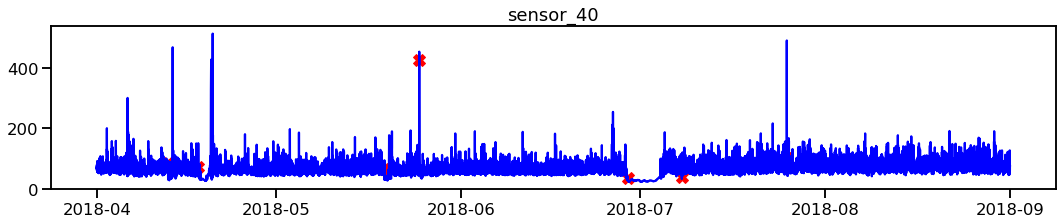

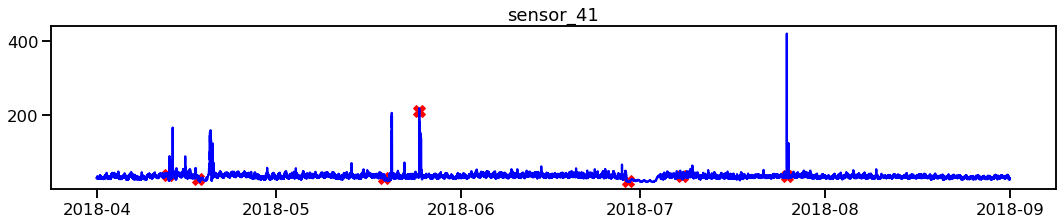

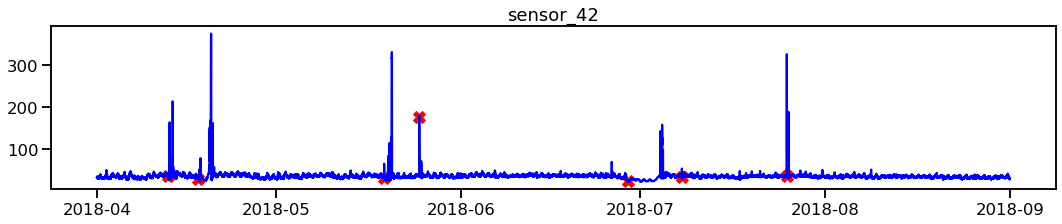

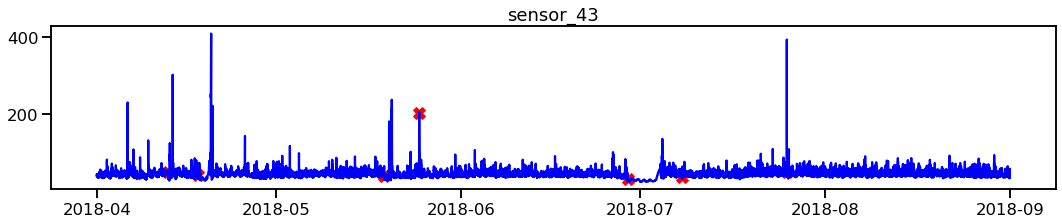

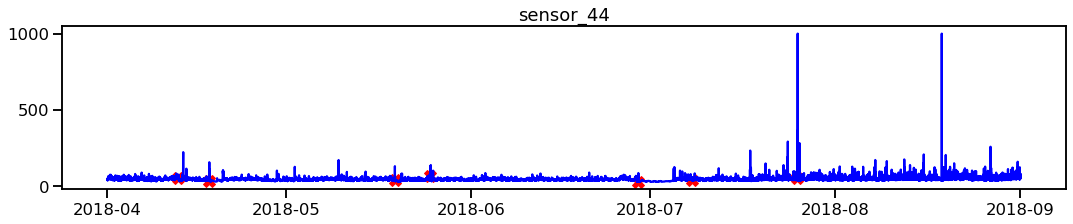

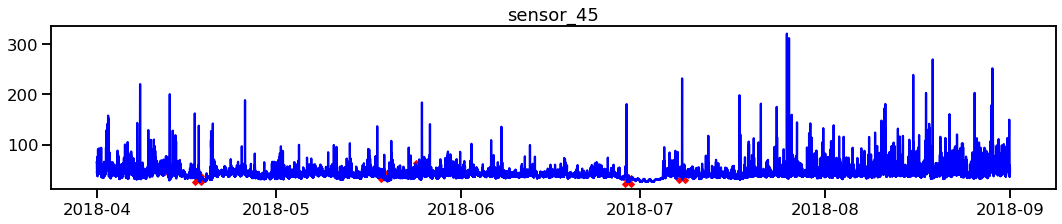

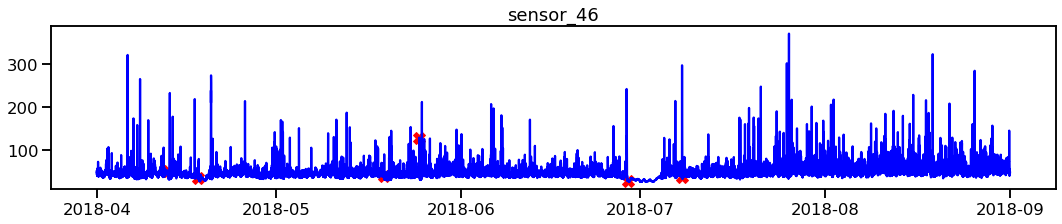

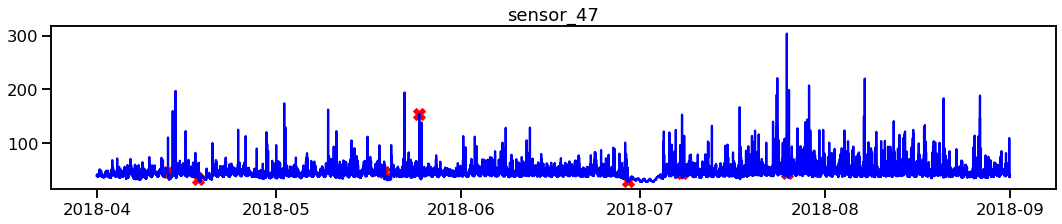

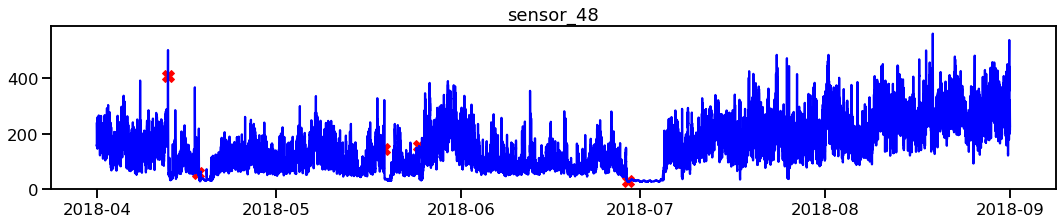

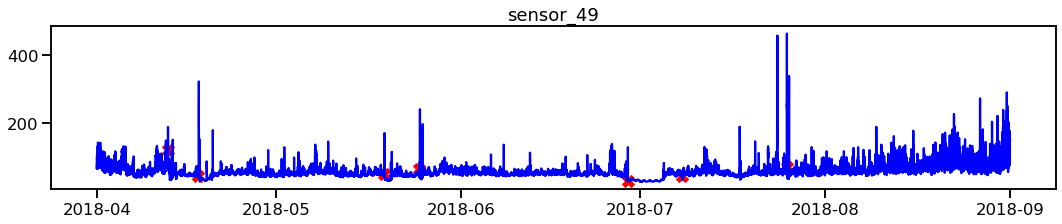

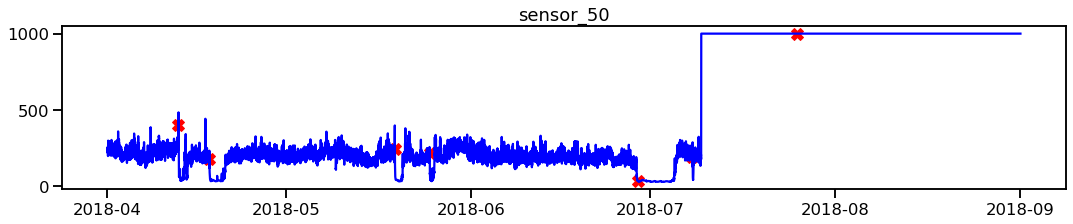

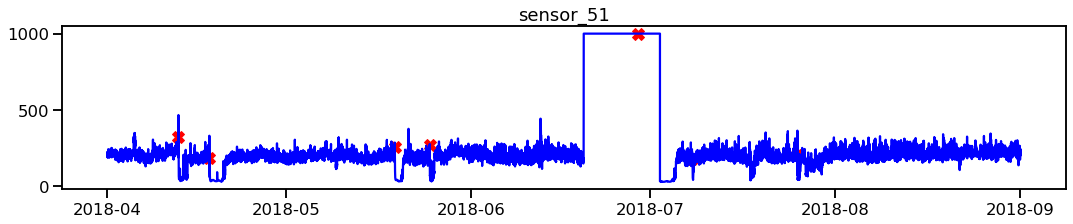

In [11]:
df_broken = df[df['machine_status'] =='BROKEN']
df_sensors = df.drop(['machine_status'], axis=1)

sensor_list = df_sensors.columns.to_list()

for sensor in sensor_list:
    sns.set_context('talk')
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(df_broken[sensor], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(df_sensors[sensor], color='blue')
    _ = plt.title(sensor)
    plt.show()